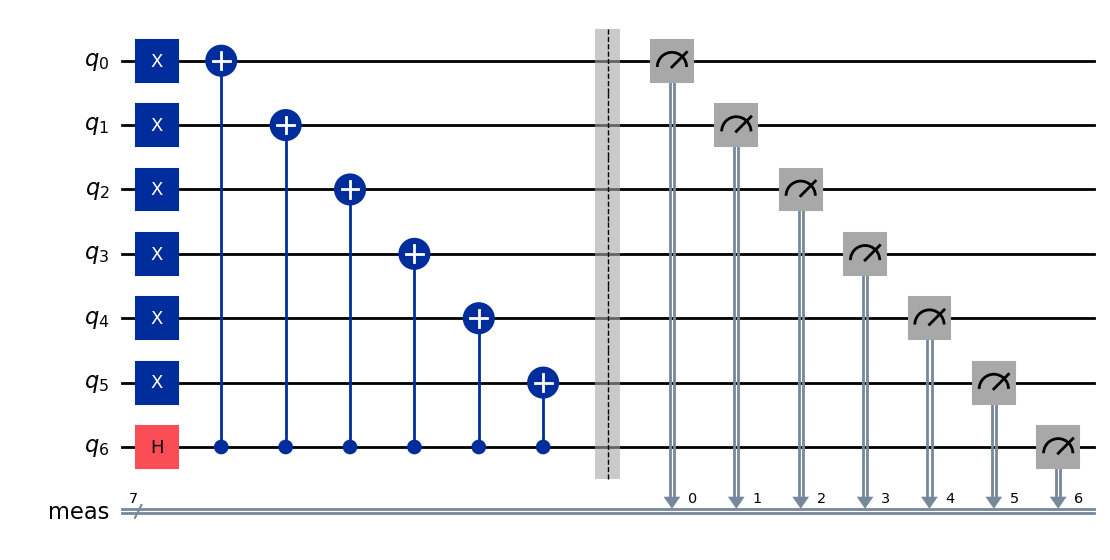

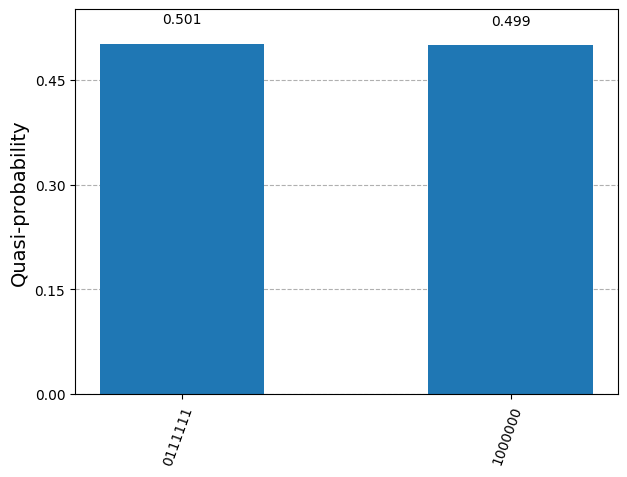

In [12]:
# Title: quantum_circuit2.ipynb
# Author: Charles "Chuck" Garcia

from IPython.display import display
from qis102_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

# Cell 1 - Circuit to produce only two states (63 or 64 decimal)

msb = 6
qc = QuantumCircuit(msb + 1)


# Place Control bit (q6) in superposition
qc.h(msb)

# Flip all lower qubits to 1
for i in range(msb):
    qc.x(i)

# Entangle them together
for i in range(0, msb):
    qc.cx(msb, i)

qc.measure_all()

# Do not modify the following code
display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

counts = result.get_counts(qc)
display(plot_distribution(counts))